## Project 1: FinTech Stock Portfolio vs. Crypto Portfolio - Comparative Analysis ##

In this notebook, we've created a comparative analysis across portfolios using quantitative metrics.

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import san
import numpy as np

%matplotlib inline

In [2]:
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
 
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

# Financial Stock Portfolio #

In [4]:
# Financial portfolio index: VISA, SQUARE, PAYPAL, MASTERCARD, AMEX

# Format current date as ISO format
today = pd.Timestamp("2016-10-08", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-10-08", tz="America/New_York").isoformat()


# Set the tickers for Financial and Technology portfolio indexes
fin_tickers = ["V", "SQ", "PYPL", "MA"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for all Fintech stocks
# (use a limit=1000 parameter to call the most recent 1000 days of data)
financial_investments = alpaca.get_barset(
    fin_tickers,
    timeframe,
    start = today,
    end = end,
    limit=1000
).df

financial_investments.head()

MA                                    PYPL  \
                             open    high     low   close   volume   open   
time                                                                        
2017-10-19 00:00:00-04:00  145.39  146.12  144.66  145.00  2330231  67.30   
2017-10-20 00:00:00-04:00  145.63  145.73  144.57  145.38  2761126  71.33   
2017-10-23 00:00:00-04:00  146.00  146.50  145.30  145.58  1644458  71.05   
2017-10-24 00:00:00-04:00  146.19  146.49  145.35  145.77  2194276  69.72   
2017-10-25 00:00:00-04:00  146.50  146.98  145.21  146.26  2251755  69.98   

                                                              SQ           \
                             high    low  close    volume   open     high   
time                                                                        
2017-10-19 00:00:00-04:00  67.450  66.16  67.27  10191782  32.09  32.2600   
2017-10-20 00:00:00-04:00  71.730  69.69  70.99  29821542  32.63  32.7500   
2017-10-23 00:00:00-04:00  71.330  69.55  69.84  10447036  32.74  32.9757   
2017-10-24 00:00:00-04:00  70.565  69.67  70.20  10228593  32.80  32.8425   
2017-10-25 00:00:00-04:00  71.420  69.85  71.03   9944016  32.99  32.9900   

                                                          V                   \
                              low    close   volume    open    high      low   
time                                                                           
2017-10-19 00:00:00-04:00  31.441  32.1103  5821528  107.27  107.78  106.900   
2017-10-20 00:00:00-04:00  32.200  32.4950  5172093  107.70  107.70  106.970   
2017-10-23 00:00:00-04:00  32.460  32.5200  3878336  108.05  108.23  107.095   
2017-10-24 00:00:00-04:00  32.500  32.7100  3147485  107.56  108.64  107.180   
2017-10-25 00:00:00-04:00  32.200  32.9000  4949101  109.50  110.61  108.000   

                                             
                            close    volume  
time                                         
2017-10-19 00:00:00-04:00  107.05   5296487  
2017-10-20 00:00:00-04:00  107.60   4612356  
2017-10-23 00:00:00-04:00  107.56   5162010  
2017-10-24 00:00:00-04:00  108.40   8418473  
2017-10-25 00:00:00-04:00  109.49  10557543

In [5]:
# Drop columns and keep close
financial_close = financial_investments.drop(financial_investments.columns[[0, 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16, 17, 19]], axis=1)
financial_close = financial_close.dropna()
financial_close.head()

,MA,PYPL,SQ,V
,close,close,close,close
time,,,,
2017-10-19 00:00:00-04:00,145.00,67.27,32.1103,107.05
2017-10-20 00:00:00-04:00,145.38,70.99,32.4950,107.60
2017-10-23 00:00:00-04:00,145.58,69.84,32.5200,107.56
2017-10-24 00:00:00-04:00,145.77,70.20,32.7100,108.40
2017-10-25 00:00:00-04:00,146.26,71.03,32.9000,109.49


In [6]:
# Calculate daily returns for each stock column
financial_close = financial_close.pct_change()

# Drop NAs
financial_close = financial_close.dropna().copy()

# Display sample data
financial_close.head()

,MA,PYPL,SQ,V
,close,close,close,close
time,,,,
2017-10-20 00:00:00-04:00,0.002621,0.055300,0.011981,0.005138
2017-10-23 00:00:00-04:00,0.001376,-0.016199,0.000769,-0.000372
2017-10-24 00:00:00-04:00,0.001305,0.005155,0.005843,0.007810
2017-10-25 00:00:00-04:00,0.003361,0.011823,0.005809,0.010055
2017-10-26 00:00:00-04:00,0.002325,0.004224,0.036778,0.003014


In [7]:
# Calculate the weighted returns for the stock portfolio with equal weights

# Set weights
financial_weights = [1/4, 1/4, 1/4, 1/4]

# Calculate portfolio return
financial_close = financial_close.dot(financial_weights)

# Display sample data
financial_close.head()

time
2017-10-20 00:00:00-04:00    0.018760
2017-10-23 00:00:00-04:00   -0.003607
2017-10-24 00:00:00-04:00    0.005028
2017-10-25 00:00:00-04:00    0.007762
2017-10-26 00:00:00-04:00    0.011585
dtype: float64

# Tech Stock Portfolio #

In [8]:
# Technology portfolio index: FACEBOOK, AMAZON, APPLE, NETFLIX, GOOGLE

# Format current date as ISO format
today = pd.Timestamp("2016-10-08", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-10-08", tz="America/New_York").isoformat()

# Set the tickers for Financial and Technology portfolio indexes
faang_tickers = ["FB", "AMZN", "AAPL", "NFLX", "GOOGL"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for all Fintech stocks
# (use a limit=1000 parameter to call the most recent 1000 days of data)
faang_investments = alpaca.get_barset(
    faang_tickers,
    timeframe,
    start = today,
    end = end,
    limit=1000
).df

faang_investments.head()

AAPL                                        AMZN  \
                             open    high     low   close      volume    open   
time                                                                            
2017-10-18 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN     NaN   
2017-10-19 00:00:00-04:00  156.75  157.08  155.02  155.98  32669974.0  990.33   
2017-10-20 00:00:00-04:00  156.61  157.75  155.96  156.25  18427186.0  993.53   
2017-10-23 00:00:00-04:00  156.89  157.69  155.50  156.20  16418890.0  986.73   
2017-10-24 00:00:00-04:00  156.29  157.42  156.20  157.09  14016780.0  969.00   

                                                               ...    GOOGL  \
                              high     low   close     volume  ...     open   
time                                                           ...            
2017-10-18 00:00:00-04:00      NaN     NaN     NaN        NaN  ...      NaN   
2017-10-19 00:00:00-04:00  991.050  980.24  986.60  1963364.0  ...  1004.75   
2017-10-20 00:00:00-04:00  994.620  982.00  982.91  1406057.0  ...  1007.05   
2017-10-23 00:00:00-04:00  986.775  962.50  966.34  2341953.0  ...  1005.18   
2017-10-24 00:00:00-04:00  979.850  965.00  976.00  1744834.0  ...   986.50   

                                                                   NFLX  \
                              high      low    close     volume    open   
time                                                                      
2017-10-18 00:00:00-04:00      NaN      NaN      NaN        NaN     NaN   
2017-10-19 00:00:00-04:00  1007.32   997.30  1001.83  1057459.0  193.01   
2017-10-20 00:00:00-04:00  1008.65  1002.27  1005.09   881271.0  195.85   
2017-10-23 00:00:00-04:00  1005.71   983.10   985.54   964752.0  194.17   
2017-10-24 00:00:00-04:00   989.26   977.08   988.50   752762.0  192.75   

                                                                   
                               high       low    close     volume  
time                                                               
2017-10-18 00:00:00-04:00       NaN       NaN      NaN        NaN  
2017-10-19 00:00:00-04:00  195.2500  191.1600  195.100  5549365.0  
2017-10-20 00:00:00-04:00  196.3800  193.7700  194.056  4539365.0  
2017-10-23 00:00:00-04:00  194.8999  191.0346  192.470  5408928.0  
2017-10-24 00:00:00-04:00  196.7350  191.4000  196.050  5796323.0  

[5 rows x 25 columns]

In [9]:
# Drop columns and keep close
faang_close = faang_investments.drop(faang_investments.columns[[0, 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16, 17, 19, 20, 21, 22, 24]], axis=1)
faang_close = faang_close.dropna()
faang_close.head()

,AAPL,AMZN,FB,GOOGL,NFLX
,close,close,close,close,close
time,,,,,
2017-10-19 00:00:00-04:00,155.98,986.60,174.56,1001.83,195.100
2017-10-20 00:00:00-04:00,156.25,982.91,174.97,1005.09,194.056
2017-10-23 00:00:00-04:00,156.20,966.34,171.28,985.54,192.470
2017-10-24 00:00:00-04:00,157.09,976.00,171.80,988.50,196.050
2017-10-25 00:00:00-04:00,156.41,972.91,170.60,991.47,193.770


In [10]:
# Calculate daily returns for each stock column
faang_close = faang_close.pct_change()

# Drop NAs
faang_close = faang_close.dropna().copy()

# Display sample data
faang_close.head()

,AAPL,AMZN,FB,GOOGL,NFLX
,close,close,close,close,close
time,,,,,
2017-10-20 00:00:00-04:00,0.001731,-0.003740,0.002349,0.003254,-0.005351
2017-10-23 00:00:00-04:00,-0.000320,-0.016858,-0.021089,-0.019451,-0.008173
2017-10-24 00:00:00-04:00,0.005698,0.009996,0.003036,0.003003,0.018600
2017-10-25 00:00:00-04:00,-0.004329,-0.003166,-0.006985,0.003005,-0.011630
2017-10-26 00:00:00-04:00,0.006457,-0.000380,0.000000,-0.000050,0.007431


In [11]:
# Calculate the weighted returns for the stock portfolio with equal weights

# Set weights
faang_weights = [1/5, 1/5, 1/5, 1/5, 1/5]

# Calculate portfolio return
faang_close = faang_close.dot(faang_weights)

# Display sample data
faang_close.head()

time
2017-10-20 00:00:00-04:00   -0.000351
2017-10-23 00:00:00-04:00   -0.013178
2017-10-24 00:00:00-04:00    0.008067
2017-10-25 00:00:00-04:00   -0.004621
2017-10-26 00:00:00-04:00    0.002692
dtype: float64

# Combine FinTech Stock Data

In [12]:
# Join the financial stock portfolio returns to the technology stock portfolio returns
fintech_portfolios = pd.concat([financial_close, faang_close], axis="columns", join="inner")
fintech_portfolios = fintech_portfolios.dropna().copy()

fintech_portfolios.columns = ['fin_stocks', 'faang_stocks']
fintech_portfolios.index = fintech_portfolios.index.strftime('%Y-%m-%d')
fintech_portfolios

,fin_stocks,faang_stocks
time,,
2017-10-20,0.018760,-0.000351
2017-10-23,-0.003607,-0.013178
2017-10-24,0.005028,0.008067
2017-10-25,0.007762,-0.004621
2017-10-26,0.011585,0.002692
...,...,...
2021-10-04,-0.040097,-0.027272
2021-10-05,0.014720,0.022367
2021-10-06,0.013321,0.007809


# Crypto Portfolio #

In [13]:
# Fetch Crypto Data and Date Ranges

btc = san.get(
    "prices/bitcoin",
    from_date="2016-10-08",
    to_date="2021-10-08",
    interval="1d"
)

eth = san.get(
    "prices/ethereum",
    from_date="2016-10-08",
    to_date="2021-10-08",
    interval="1d"
)

ltc = san.get(
    "prices/litecoin",
    from_date="2016-10-08",
    to_date="2021-10-08",
    interval="1d"
)

ada = san.get(
    "prices/cardano",
    from_date="2016-10-08",
    to_date="2021-10-08",
    interval="1d"
)

doge = san.get(
    "prices/dogecoin",
    from_date="2016-10-08",
    to_date="2021-10-08",
    interval="1d"
)

In [14]:
# Combine all crypto data into a single DataFrame
crypto_df = pd.concat([btc, eth, ltc, ada, doge], axis=1, join="inner")
crypto_close = crypto_df.drop(crypto_df.columns[[0,1,3,4,5,7,8,9,11,12,13,15]], axis=1)
crypto_close.index = crypto_close.index.strftime('%Y-%m-%d')
crypto_close.head()

,priceUsd,priceUsd,priceUsd,priceUsd,priceUsd
datetime,,,,,
2017-10-01,4403.74,302.337,54.5433,0.024969,0.001084
2017-10-02,4409.32,297.475,53.3760,0.025932,0.001085
2017-10-03,4317.48,292.463,52.3496,0.020816,0.001108
2017-10-04,4229.36,292.658,51.3995,0.021931,0.001024
2017-10-05,4328.41,295.863,51.6695,0.021489,0.001001


In [15]:
# Calculate daily returns for each crypto column
crypto_daily_returns = crypto_df.pct_change()

# Drop NAs
crypto_daily_returns = crypto_daily_returns.drop(crypto_df.columns[[0,1,3,4,5,7,8,9,11,12,13,15]], axis=1)

# Rename Column Headers
crypto_daily_returns.columns=['BTC', 'ETH', 'LTC', 'ADA', 'DOGE']

crypto_daily_returns.index = crypto_daily_returns.index.strftime('%Y-%m-%d')

# Display sample data
crypto_daily_returns.head()

,BTC,ETH,LTC,ADA,DOGE
datetime,,,,,
2017-10-01,NaN,NaN,NaN,NaN,NaN
2017-10-02,0.001267,-0.016081,-0.021401,0.038539,0.001606
2017-10-03,-0.020829,-0.016848,-0.019230,-0.197287,0.021219
2017-10-04,-0.020410,0.000667,-0.018149,0.053599,-0.075795
2017-10-05,0.023420,0.010951,0.005253,-0.020190,-0.022501


In [16]:
# Calculate the weighted returns for the crypto portfolio with equal weights

# Set weights
crypto_weights = [1/5, 1/5, 1/5, 1/5, 1/5]

# Calculate portfolio return
crypto_close = crypto_daily_returns.dot(crypto_weights).dropna()

# Display sample data
crypto_close.head()

datetime
2017-10-02    0.000786
2017-10-03   -0.046595
2017-10-04   -0.012018
2017-10-05   -0.000614
2017-10-06   -0.004222
dtype: float64

# Combined Portfolio Data #

In [17]:
# Join the crypto portfolio returns with the fintech portfolio returns into new data frame

all_portfolios = pd.concat([fintech_portfolios, crypto_close], axis=1, join='inner')
all_portfolios.columns = ['fin_stocks', 'faang_stocks', 'crypto']

all_portfolios


,fin_stocks,faang_stocks,crypto
2017-10-20,0.018760,-0.000351,0.034055
2017-10-23,-0.003607,-0.013178,-0.032835
2017-10-24,0.005028,0.008067,0.026890
2017-10-25,0.007762,-0.004621,0.005504
2017-10-26,0.011585,0.002692,-0.001952
...,...,...,...
2021-10-04,-0.040097,-0.027272,0.009531
2021-10-05,0.014720,0.022367,0.038833
2021-10-06,0.013321,0.007809,0.024595
2021-10-07,0.018456,0.001873,-0.008841


# Quantitative Analysis #

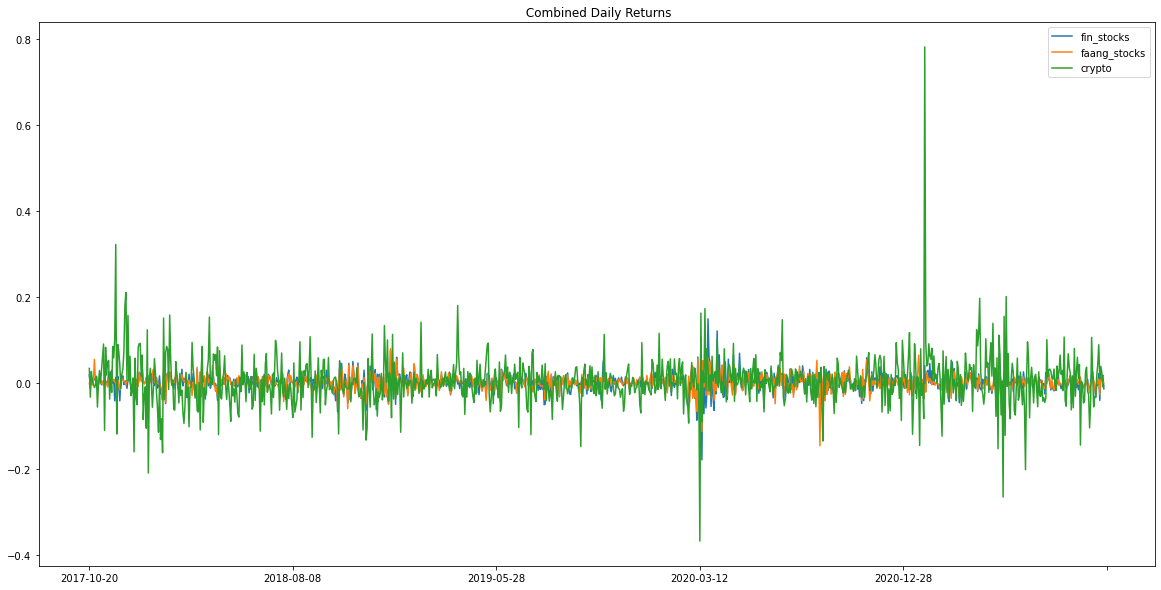

In [18]:
# Plot daily returns of all portfolios
all_portfolios.plot(figsize=(20, 10), title=" Combined Daily Returns");

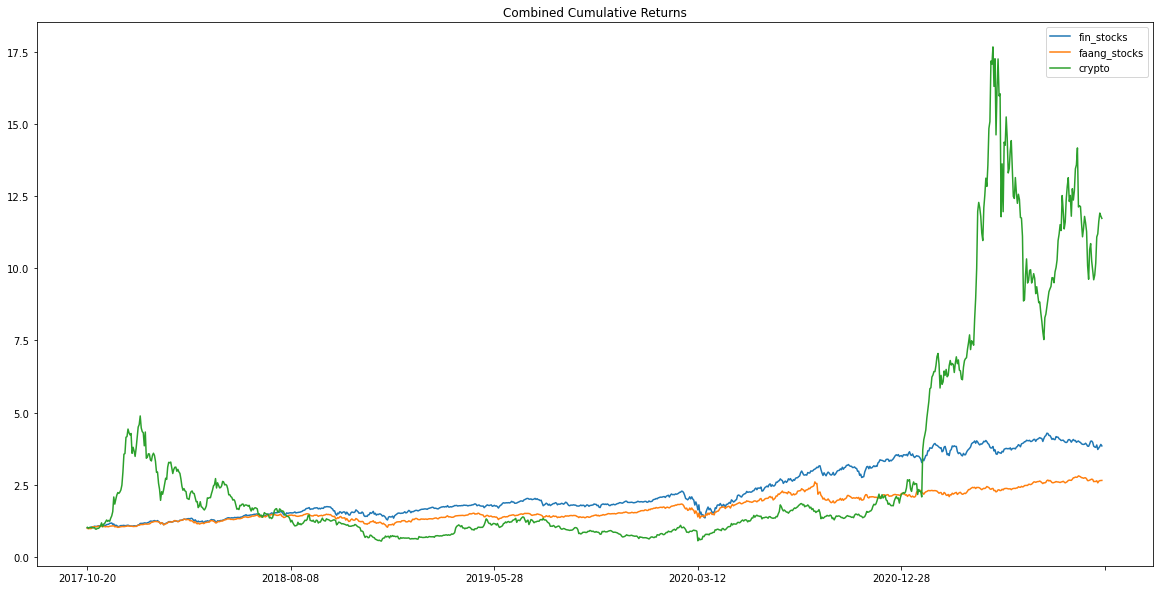

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_portfolios).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10), title="Combined Cumulative Returns");

# Risk Analysis #

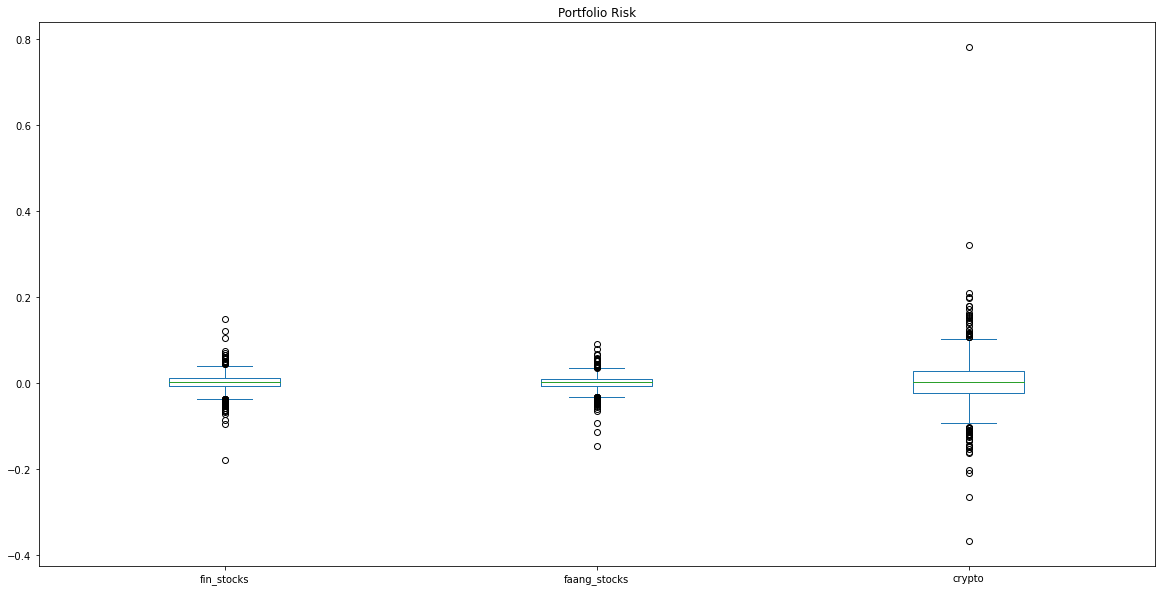

In [20]:
# Box plot to visually show risk
all_portfolios.plot.box(figsize=(20, 10), title="Portfolio Risk");

In [21]:
# Calculate the daily standard deviations of all portfolios
all_portfolios.std()

fin_stocks      0.021266
faang_stocks    0.018293
crypto          0.058436
dtype: float64

In [22]:
# Calculate the annualized standard deviation (252 trading days)
anual_std = all_portfolios.std() * np.sqrt(252)
anual_std

fin_stocks      0.337582
faang_stocks    0.290396
crypto          0.927638
dtype: float64

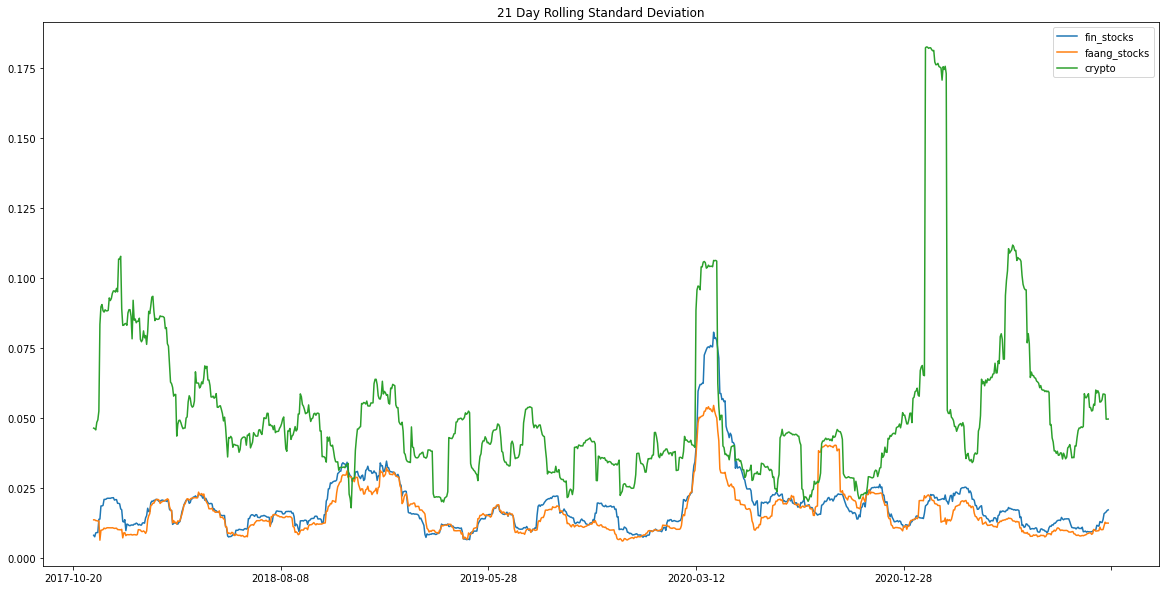

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_portfolios_roll_std = all_portfolios.rolling(window=21).std()

# Plot the rolling standard deviation
all_portfolios_roll_std.plot(figsize=(20, 10), title="21 Day Rolling Standard Deviation");

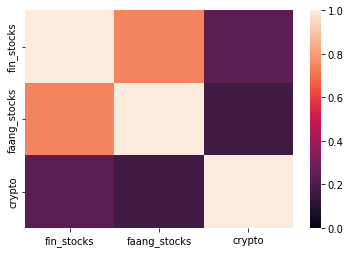

In [24]:
# Calculate the correlation
corr_df = all_portfolios.corr()

# Import Heatmap & Display the correlation matrix
import seaborn as sns

sns.heatmap(corr_df, vmin =0, vmax=1);

<AxesSubplot:title={'center':'Crypto Beta'}>

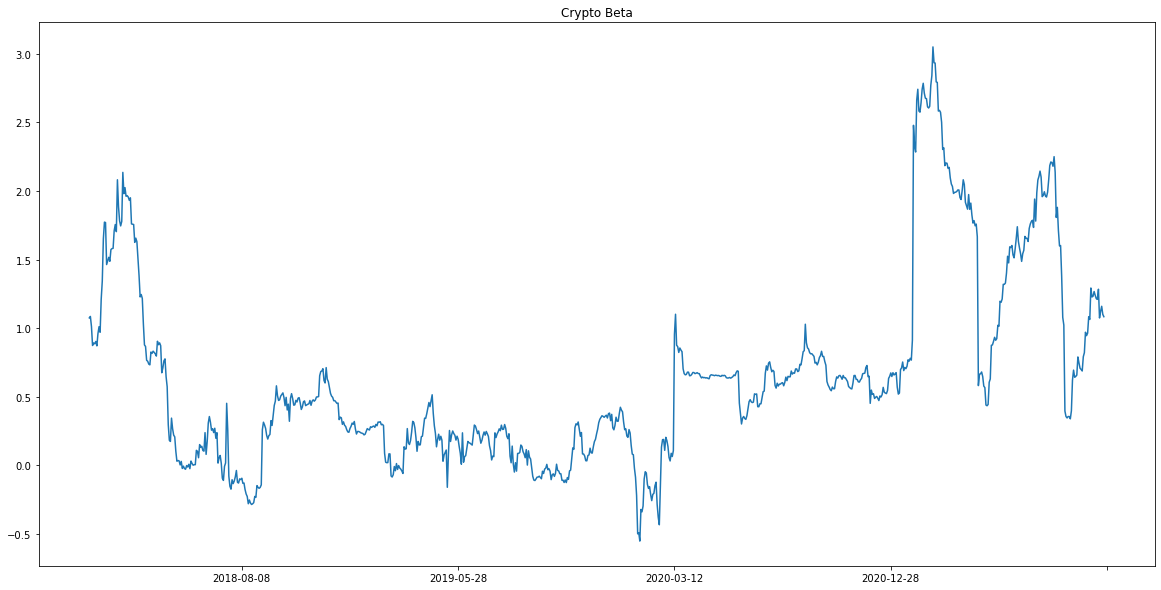

In [25]:
# Calculate covariance of a single portfolio
covariance = all_portfolios["crypto"].rolling(window=60).cov(all_portfolios["fin_stocks"])

# Calculate variance of S&P TSX
variance = all_portfolios["fin_stocks"].rolling(60).var()

# Computing beta
beta = covariance / variance

# Plot beta trend
beta.plot(figsize=(20, 10), title="Crypto Beta")

# Sharpe Ratios #

In [26]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
sharpe_ratios

fin_stocks      1.178931
faang_stocks    0.996877
crypto          1.112325
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

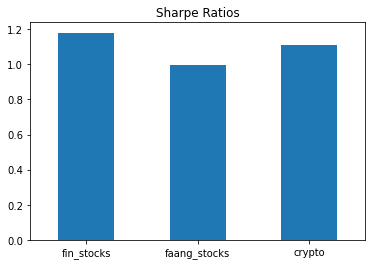

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios", rot=0)

# Financial Stock Portfolio Monte Carlo Simulation #

In [35]:
# Configuring a Financial Stock Portfolio Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year_fin = MCSimulation(
    portfolio_data = financial_investments,
    weights = [1/4, 1/4, 1/4, 1/4],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [36]:
# Printing the simulation input data
MC_ten_year_fin.portfolio_data.head()

MA                                   \
                             open    high     low   close   volume   
time                                                                 
2017-10-19 00:00:00-04:00  145.39  146.12  144.66  145.00  2330231   
2017-10-20 00:00:00-04:00  145.63  145.73  144.57  145.38  2761126   
2017-10-23 00:00:00-04:00  146.00  146.50  145.30  145.58  1644458   
2017-10-24 00:00:00-04:00  146.19  146.49  145.35  145.77  2194276   
2017-10-25 00:00:00-04:00  146.50  146.98  145.21  146.26  2251755   

                                         PYPL                        ...  \
                          daily_return   open    high    low  close  ...   
time                                                                 ...   
2017-10-19 00:00:00-04:00          NaN  67.30  67.450  66.16  67.27  ...   
2017-10-20 00:00:00-04:00     0.002621  71.33  71.730  69.69  70.99  ...   
2017-10-23 00:00:00-04:00     0.001376  71.05  71.330  69.55  69.84  ...   
2017-10-24 00:00:00-04:00     0.001305  69.72  70.565  69.67  70.20  ...   
2017-10-25 00:00:00-04:00     0.003361  69.98  71.420  69.85  71.03  ...   

                               SQ                                      V  \
                              low    close   volume daily_return    open   
time                                                                       
2017-10-19 00:00:00-04:00  31.441  32.1103  5821528          NaN  107.27   
2017-10-20 00:00:00-04:00  32.200  32.4950  5172093     0.011981  107.70   
2017-10-23 00:00:00-04:00  32.460  32.5200  3878336     0.000769  108.05   
2017-10-24 00:00:00-04:00  32.500  32.7100  3147485     0.005843  107.56   
2017-10-25 00:00:00-04:00  32.200  32.9000  4949101     0.005809  109.50   

                                                                           
                             high      low   close    volume daily_return  
time                                                                       
2017-10-19 00:00:00-04:00  107.78  106.900  107.05   5296487          NaN  
2017-10-20 00:00:00-04:00  107.70  106.970  107.60   4612356     0.005138  
2017-10-23 00:00:00-04:00  108.23  107.095  107.56   5162010    -0.000372  
2017-10-24 00:00:00-04:00  108.64  107.180  108.40   8418473     0.007810  
2017-10-25 00:00:00-04:00  110.61  108.000  109.49  10557543     0.010055  

[5 rows x 24 columns]

In [37]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year_fin.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ijmel\GitHub\Group-Project-1\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999897,1.018649,1.009589,0.992488,1.006756,0.999830,0.993871,0.992445,1.002367,0.980826,...,1.003376,1.042416,0.986642,1.003582,1.002998,0.996289,1.017464,1.027553,1.012100,0.963649
2,1.006358,1.032572,0.982838,0.992788,1.015635,0.997814,0.950001,0.981508,1.014094,0.980955,...,1.003130,1.036970,0.981492,1.004124,0.994168,0.999109,1.007036,1.040729,1.016603,0.960613
3,1.011848,1.019266,0.993008,0.992376,1.025471,0.998178,0.952082,0.975354,1.012265,0.983871,...,0.993326,1.047646,0.988224,1.018487,1.016478,1.012277,1.003229,1.029894,0.999224,0.951511
4,1.005226,1.010922,1.000816,1.019270,1.024679,0.978336,0.973938,0.964881,1.011915,0.983251,...,1.007269,1.056320,0.997543,1.017698,1.027470,1.041907,0.996051,1.028554,0.977005,0.958644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,19.409005,11.642603,39.190663,71.529534,67.475742,30.421874,82.320185,79.742619,37.591712,70.472721,...,72.135388,127.176679,84.335090,53.796101,47.731061,43.672200,108.873990,47.700913,47.760952,60.667940
2517,19.337771,11.664360,38.759062,73.413195,69.043240,30.578552,81.434574,79.226980,37.399154,70.397066,...,72.434365,126.222179,84.272711,53.555097,48.055676,43.939795,109.613775,49.115342,47.522490,60.472137
2518,19.423697,11.797699,39.185957,71.433746,68.539808,30.304952,83.130167,77.785244,37.305419,69.617489,...,72.960323,126.285530,84.168433,54.375242,47.956695,43.772568,108.860058,48.531435,47.289000,61.057527
2519,19.560298,11.694240,39.240970,73.076333,70.061770,29.845075,82.632344,78.887451,37.206499,69.716601,...,73.234674,123.678866,84.592206,55.020898,47.299371,44.198071,107.490823,48.397216,47.964242,59.384096


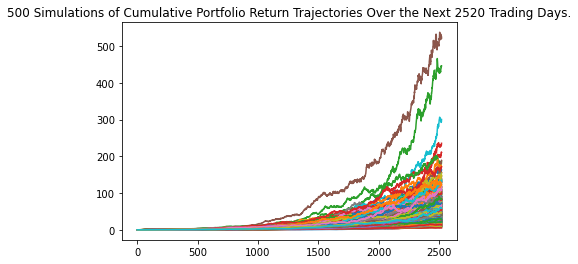

In [38]:
# Plot simulation outcomes
line_plot = MC_ten_year_fin.plot_simulation()

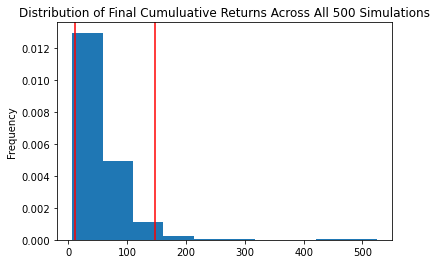

In [39]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten_year_fin.plot_distribution()

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_ten_year_fin.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             54.590130
std              45.840612
min               6.461295
25%              27.428214
50%              42.361721
75%              70.262027
max             523.889262
95% CI Lower     11.943716
95% CI Upper    147.997964
Name: 2520, dtype: float64


In [42]:
# Calculate the expected Financial Stock Portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $238874.31 and $2959959.29


# Technology Stock Portfolio Monte Carlo Simulation

In [43]:
# Configuring a Technology Stock Portfolio Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year_faang = MCSimulation(
    portfolio_data = faang_investments,
    weights = [1/5, 1/5, 1/5, 1/5, 1/5],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [44]:
# Printing the simulation input data
MC_ten_year_faang.portfolio_data.head()

AAPL                                      \
                             open    high     low   close      volume   
time                                                                    
2017-10-18 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN   
2017-10-19 00:00:00-04:00  156.75  157.08  155.02  155.98  32669974.0   
2017-10-20 00:00:00-04:00  156.61  157.75  155.96  156.25  18427186.0   
2017-10-23 00:00:00-04:00  156.89  157.69  155.50  156.20  16418890.0   
2017-10-24 00:00:00-04:00  156.29  157.42  156.20  157.09  14016780.0   

                                          AMZN                           ...  \
                          daily_return    open     high     low   close  ...   
time                                                                     ...   
2017-10-18 00:00:00-04:00          NaN     NaN      NaN     NaN     NaN  ...   
2017-10-19 00:00:00-04:00          NaN  990.33  991.050  980.24  986.60  ...   
2017-10-20 00:00:00-04:00     0.001731  993.53  994.620  982.00  982.91  ...   
2017-10-23 00:00:00-04:00    -0.000320  986.73  986.775  962.50  966.34  ...   
2017-10-24 00:00:00-04:00     0.005698  969.00  979.850  965.00  976.00  ...   

                             GOOGL                                     NFLX  \
                               low    close     volume daily_return    open   
time                                                                          
2017-10-18 00:00:00-04:00      NaN      NaN        NaN          NaN     NaN   
2017-10-19 00:00:00-04:00   997.30  1001.83  1057459.0          NaN  193.01   
2017-10-20 00:00:00-04:00  1002.27  1005.09   881271.0     0.003254  195.85   
2017-10-23 00:00:00-04:00   983.10   985.54   964752.0    -0.019451  194.17   
2017-10-24 00:00:00-04:00   977.08   988.50   752762.0     0.003003  192.75   

                                                                                
                               high       low    close     volume daily_return  
time                                                                            
2017-10-18 00:00:00-04:00       NaN       NaN      NaN        NaN          NaN  
2017-10-19 00:00:00-04:00  195.2500  191.1600  195.100  5549365.0          NaN  
2017-10-20 00:00:00-04:00  196.3800  193.7700  194.056  4539365.0    -0.005351  
2017-10-23 00:00:00-04:00  194.8999  191.0346  192.470  5408928.0    -0.008173  
2017-10-24 00:00:00-04:00  196.7350  191.4000  196.050  5796323.0     0.018600  

[5 rows x 30 columns]

In [45]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year_faang.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ijmel\GitHub\Group-Project-1\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011445,1.009998,1.003455,0.998955,0.998763,0.984635,1.011498,0.994924,1.022443,1.010391,...,1.011268,0.994689,1.000319,0.981132,0.999048,0.998671,1.005271,1.023836,0.979896,1.000106
2,1.015535,1.027640,1.004516,1.001850,1.000071,0.997710,1.018896,1.002765,1.015829,1.024730,...,1.010775,0.982284,1.029624,0.993790,1.005608,0.987031,0.996237,1.025421,0.983048,1.014156
3,1.023953,1.037466,1.011905,1.005872,1.006860,0.997821,1.015902,1.018608,1.026629,1.021662,...,1.020098,0.987246,1.031657,0.990960,1.007784,0.984269,0.978120,1.016199,0.982387,0.997145
4,1.026306,1.039031,1.008104,1.026436,1.016185,1.007568,1.003207,1.014949,1.025239,1.033072,...,1.014959,0.975072,1.043357,0.997603,1.014293,0.980886,0.990318,1.015665,1.002984,1.003676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,14.515446,7.705195,12.198277,24.975412,51.033082,16.612297,28.218330,15.891991,29.361737,13.842885,...,9.825374,8.045552,11.314473,16.680727,24.940191,13.997457,8.188997,8.163814,8.019589,14.930604
2517,14.368927,7.823899,12.230870,25.025094,50.411504,16.548434,28.566289,15.880379,29.303160,14.079670,...,9.808050,7.993445,11.395657,16.642442,24.892520,13.777896,8.191977,8.119623,8.014630,14.667372
2518,14.518991,7.822170,12.185048,25.038089,50.806925,16.467581,28.626691,15.957924,29.778445,13.977414,...,9.760258,8.014833,11.489457,16.426712,25.418569,13.729444,8.199777,8.259605,8.026382,14.585825
2519,14.371187,7.708107,12.265368,25.004877,51.300127,16.483213,28.196974,16.221298,30.403853,13.975765,...,9.730486,8.210142,11.350619,16.603528,25.537022,13.753238,8.139267,8.321569,8.153609,14.474820


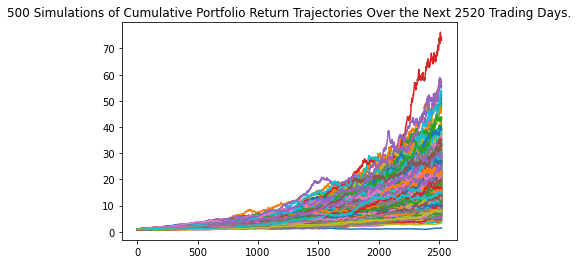

In [46]:
# Plot simulation outcomes
line_plot = MC_ten_year_faang.plot_simulation()

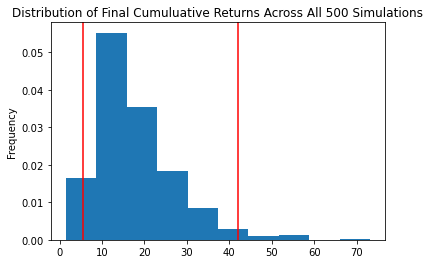

In [47]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten_year_faang.plot_distribution()

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_ten_year_faang.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             17.775661
std               9.686673
min               1.458295
25%              11.259769
50%              15.406842
75%              22.379323
max              73.206261
95% CI Lower      5.452763
95% CI Upper     42.059149
Name: 2520, dtype: float64


In [49]:
# Calculate the expected Technology Stock Portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $109055.25 and $841182.98


# Convert DataFrames to CSV

In [50]:
all_portfolios.to_csv("Resources/all_portfolios.csv")

In [51]:
financial_close.to_csv("Resources/fintech_portfolios.csv")

In [52]:
faang_close.to_csv("Resources/faang_close.csv")